# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [4]:
%pip install yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold  import TSNE


Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [11]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X)

KMeans()

In [10]:
score = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean', sample_size = len(X))
print('Silhouette score: ', score)

Silhouette score:  0.5369954815914436


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [13]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
score = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean', sample_size = len(X))
print('Silhouette score: ', score)

Silhouette score:  0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [14]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
score = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean', sample_size = len(X))
print('Silhouette score: ', score)

Silhouette score:  0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

C:\Users\angel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


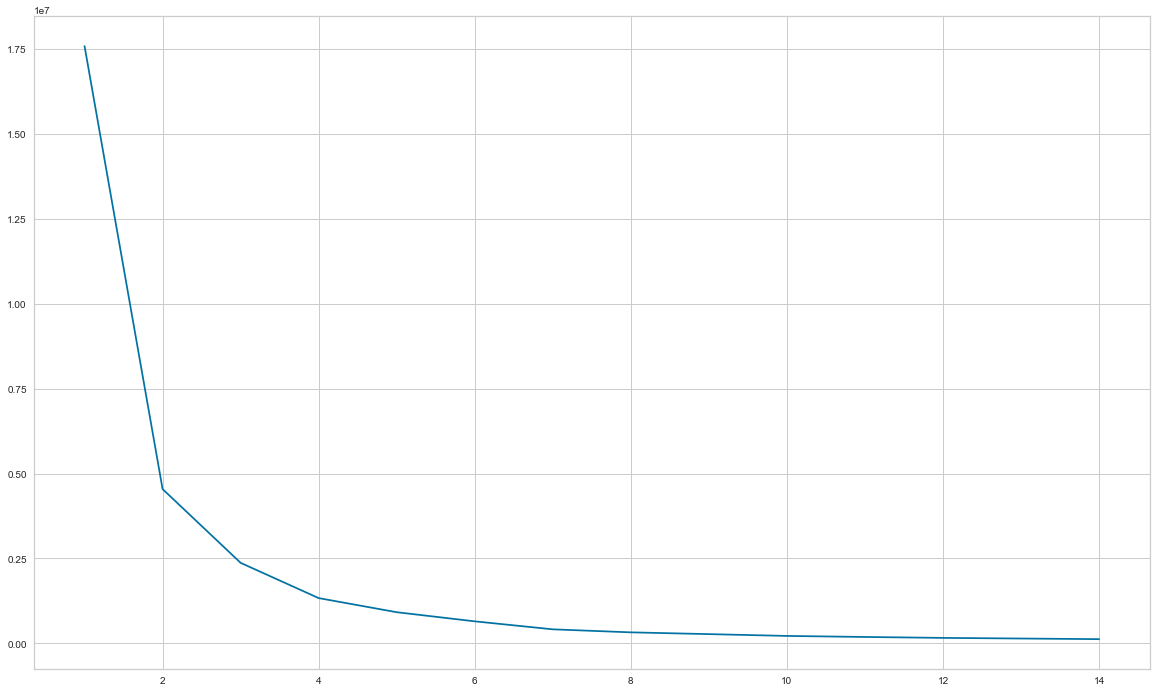

In [16]:
sum_of_squared_distances = []
K = range(1, 15)
for i in K:
      km = KMeans (n_clusters = i)
      km = km.fit(X)
      sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize = (20,12))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.show();

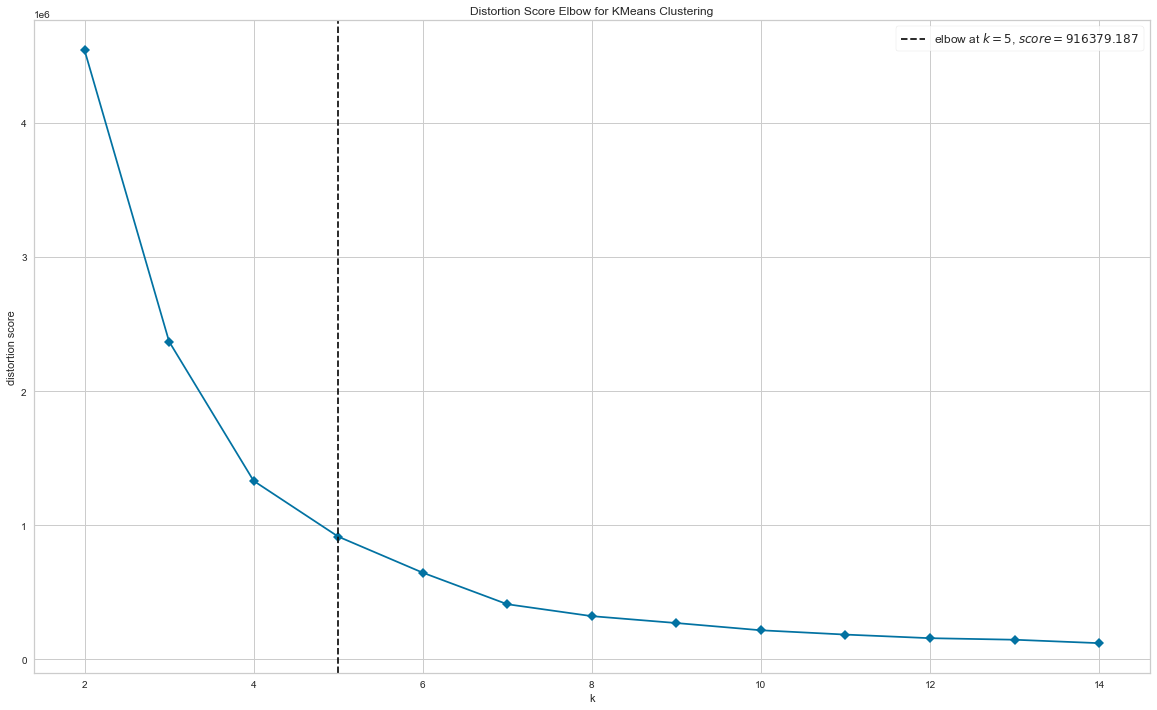

In [20]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2, 15), metric = 'distortion', timings = False, locate_elbow = True)
plt.figure(figsize = (20,12))
visualizer.fit(X)
visualizer.show();

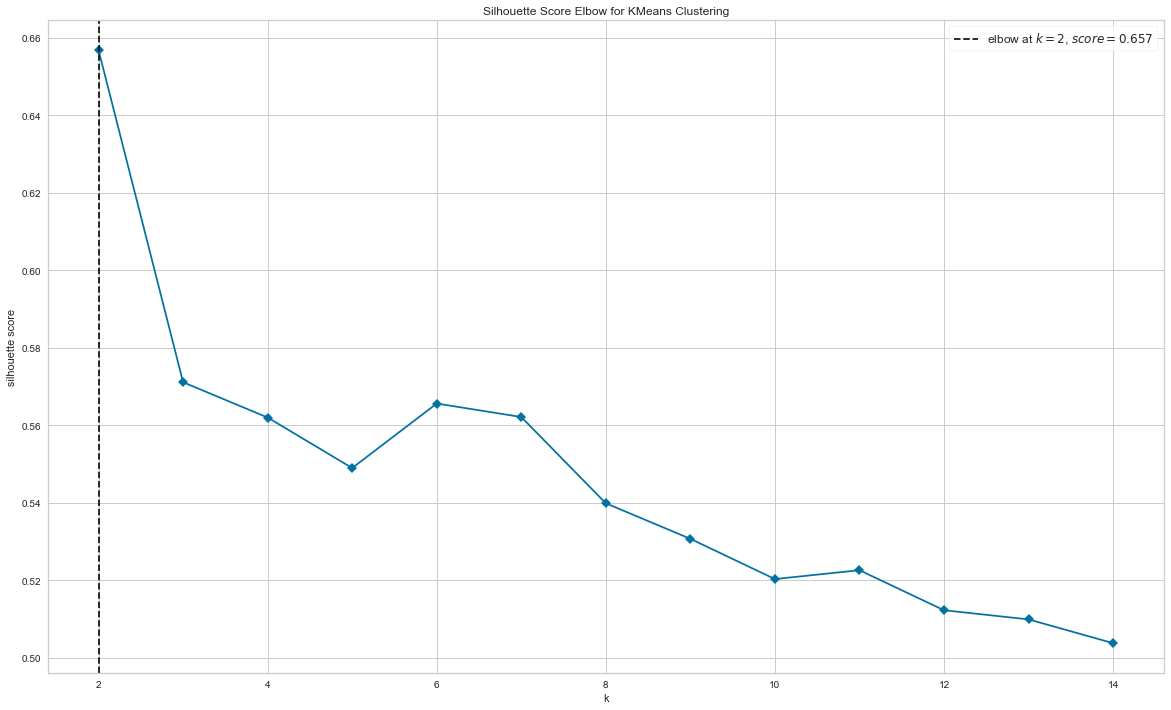

In [22]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2, 15), metric = 'silhouette', timings = False, locate_elbow = True)
plt.figure(figsize = (20,12))
visualizer.fit(X)
visualizer.show();

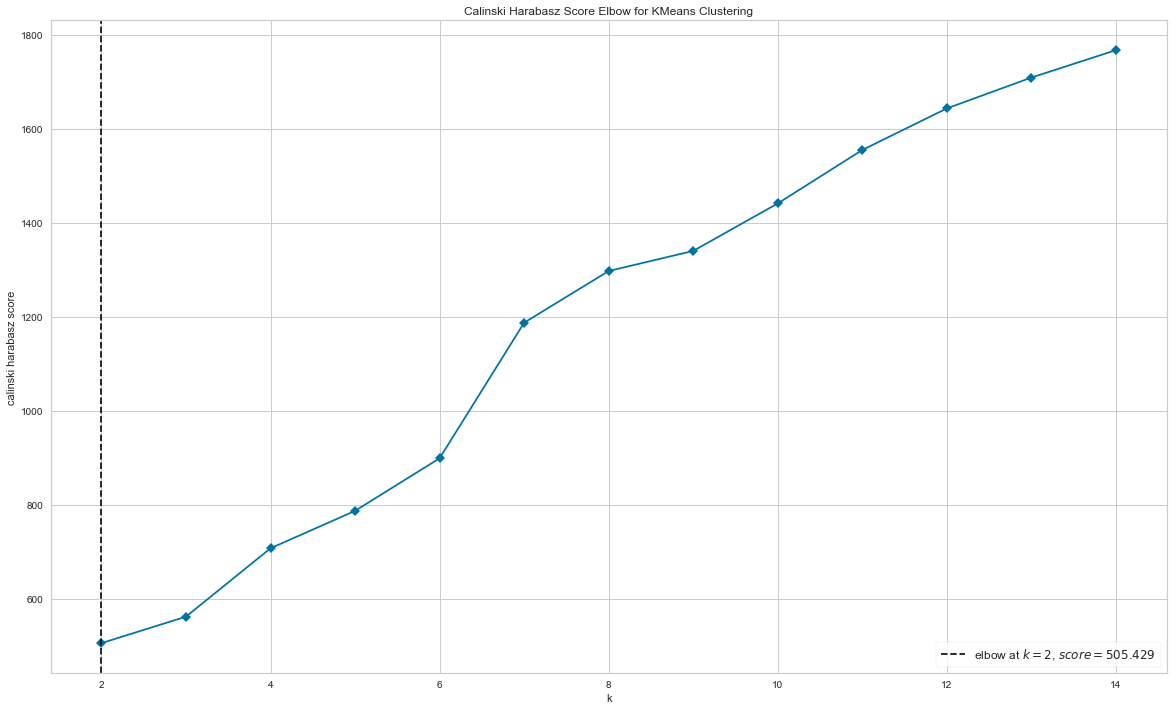

In [24]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2, 15), metric = 'calinski_harabasz', timings = False, locate_elbow = True)
plt.figure(figsize = (20,12))
visualizer.fit(X)
visualizer.show();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

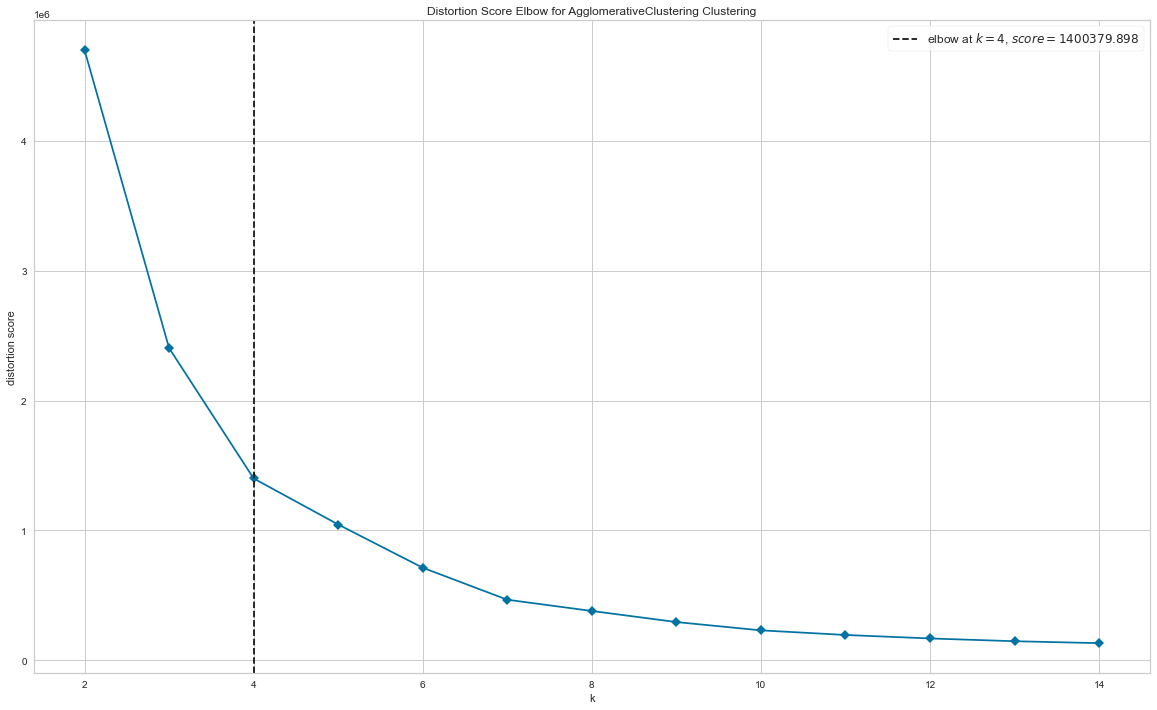

In [25]:
agg_clustering = AgglomerativeClustering()
visualizer = KElbowVisualizer(agg_clustering, k = (2, 15), metric = 'distortion', timings = False, locate_elbow = True)
plt.figure(figsize = (20,12))
visualizer.fit(X)
visualizer.show();

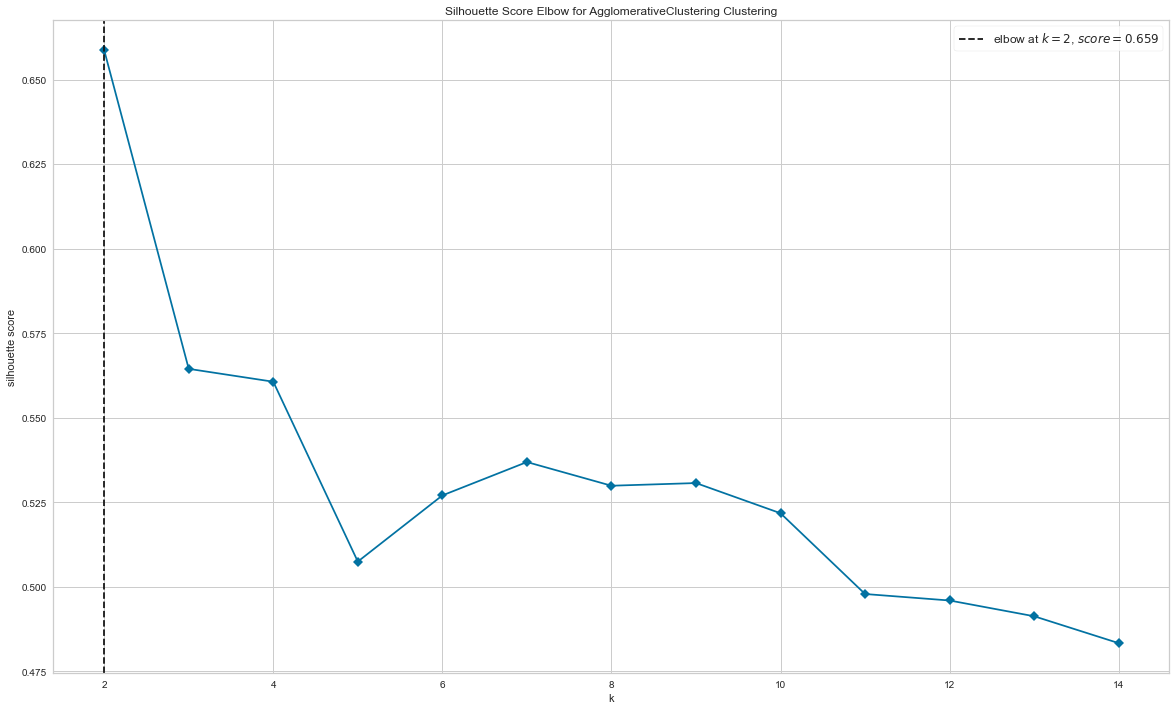

In [27]:
agg_clustering = AgglomerativeClustering()
visualizer = KElbowVisualizer(agg_clustering, k = (2, 15), metric = 'silhouette', timings = False, locate_elbow = True)
plt.figure(figsize = (20,12))
visualizer.fit(X)
visualizer.show();

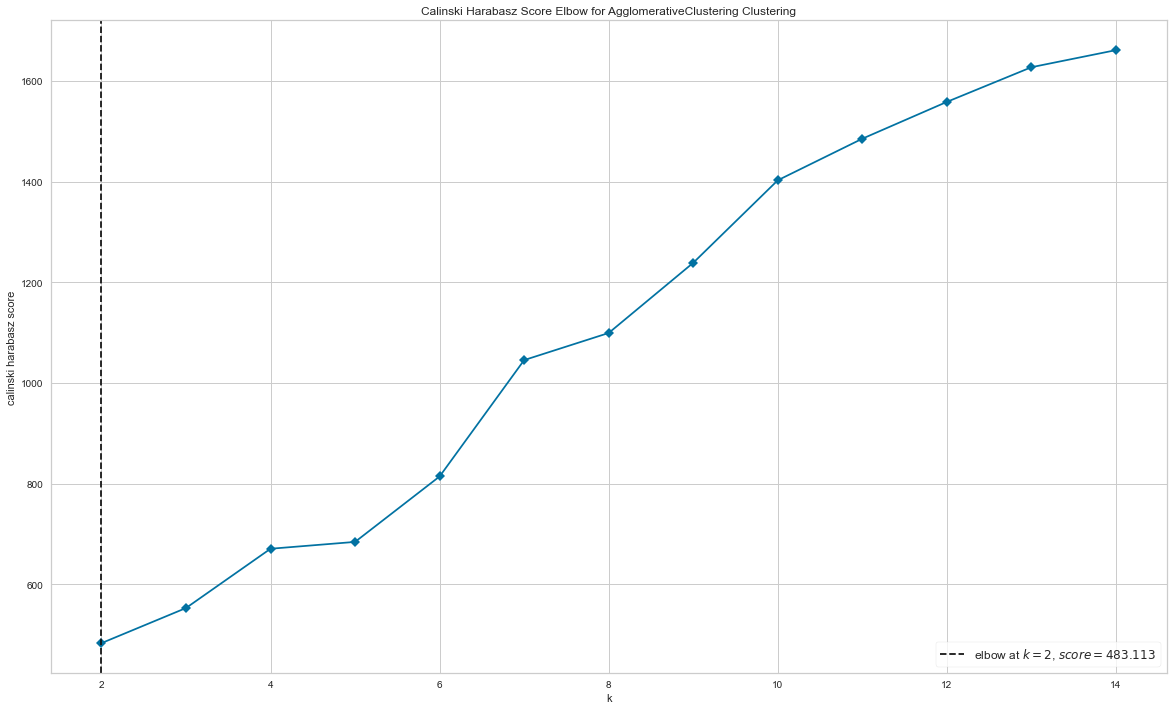

In [28]:
agg_clustering = AgglomerativeClustering()
visualizer = KElbowVisualizer(agg_clustering, k = (2, 15), metric = 'calinski_harabasz', timings = False, locate_elbow = True)
plt.figure(figsize = (20,12))
visualizer.fit(X)
visualizer.show();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [29]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)
cluster_pred = kmeans.predict(X)
X['Kmean_cluster'] = cluster_pred

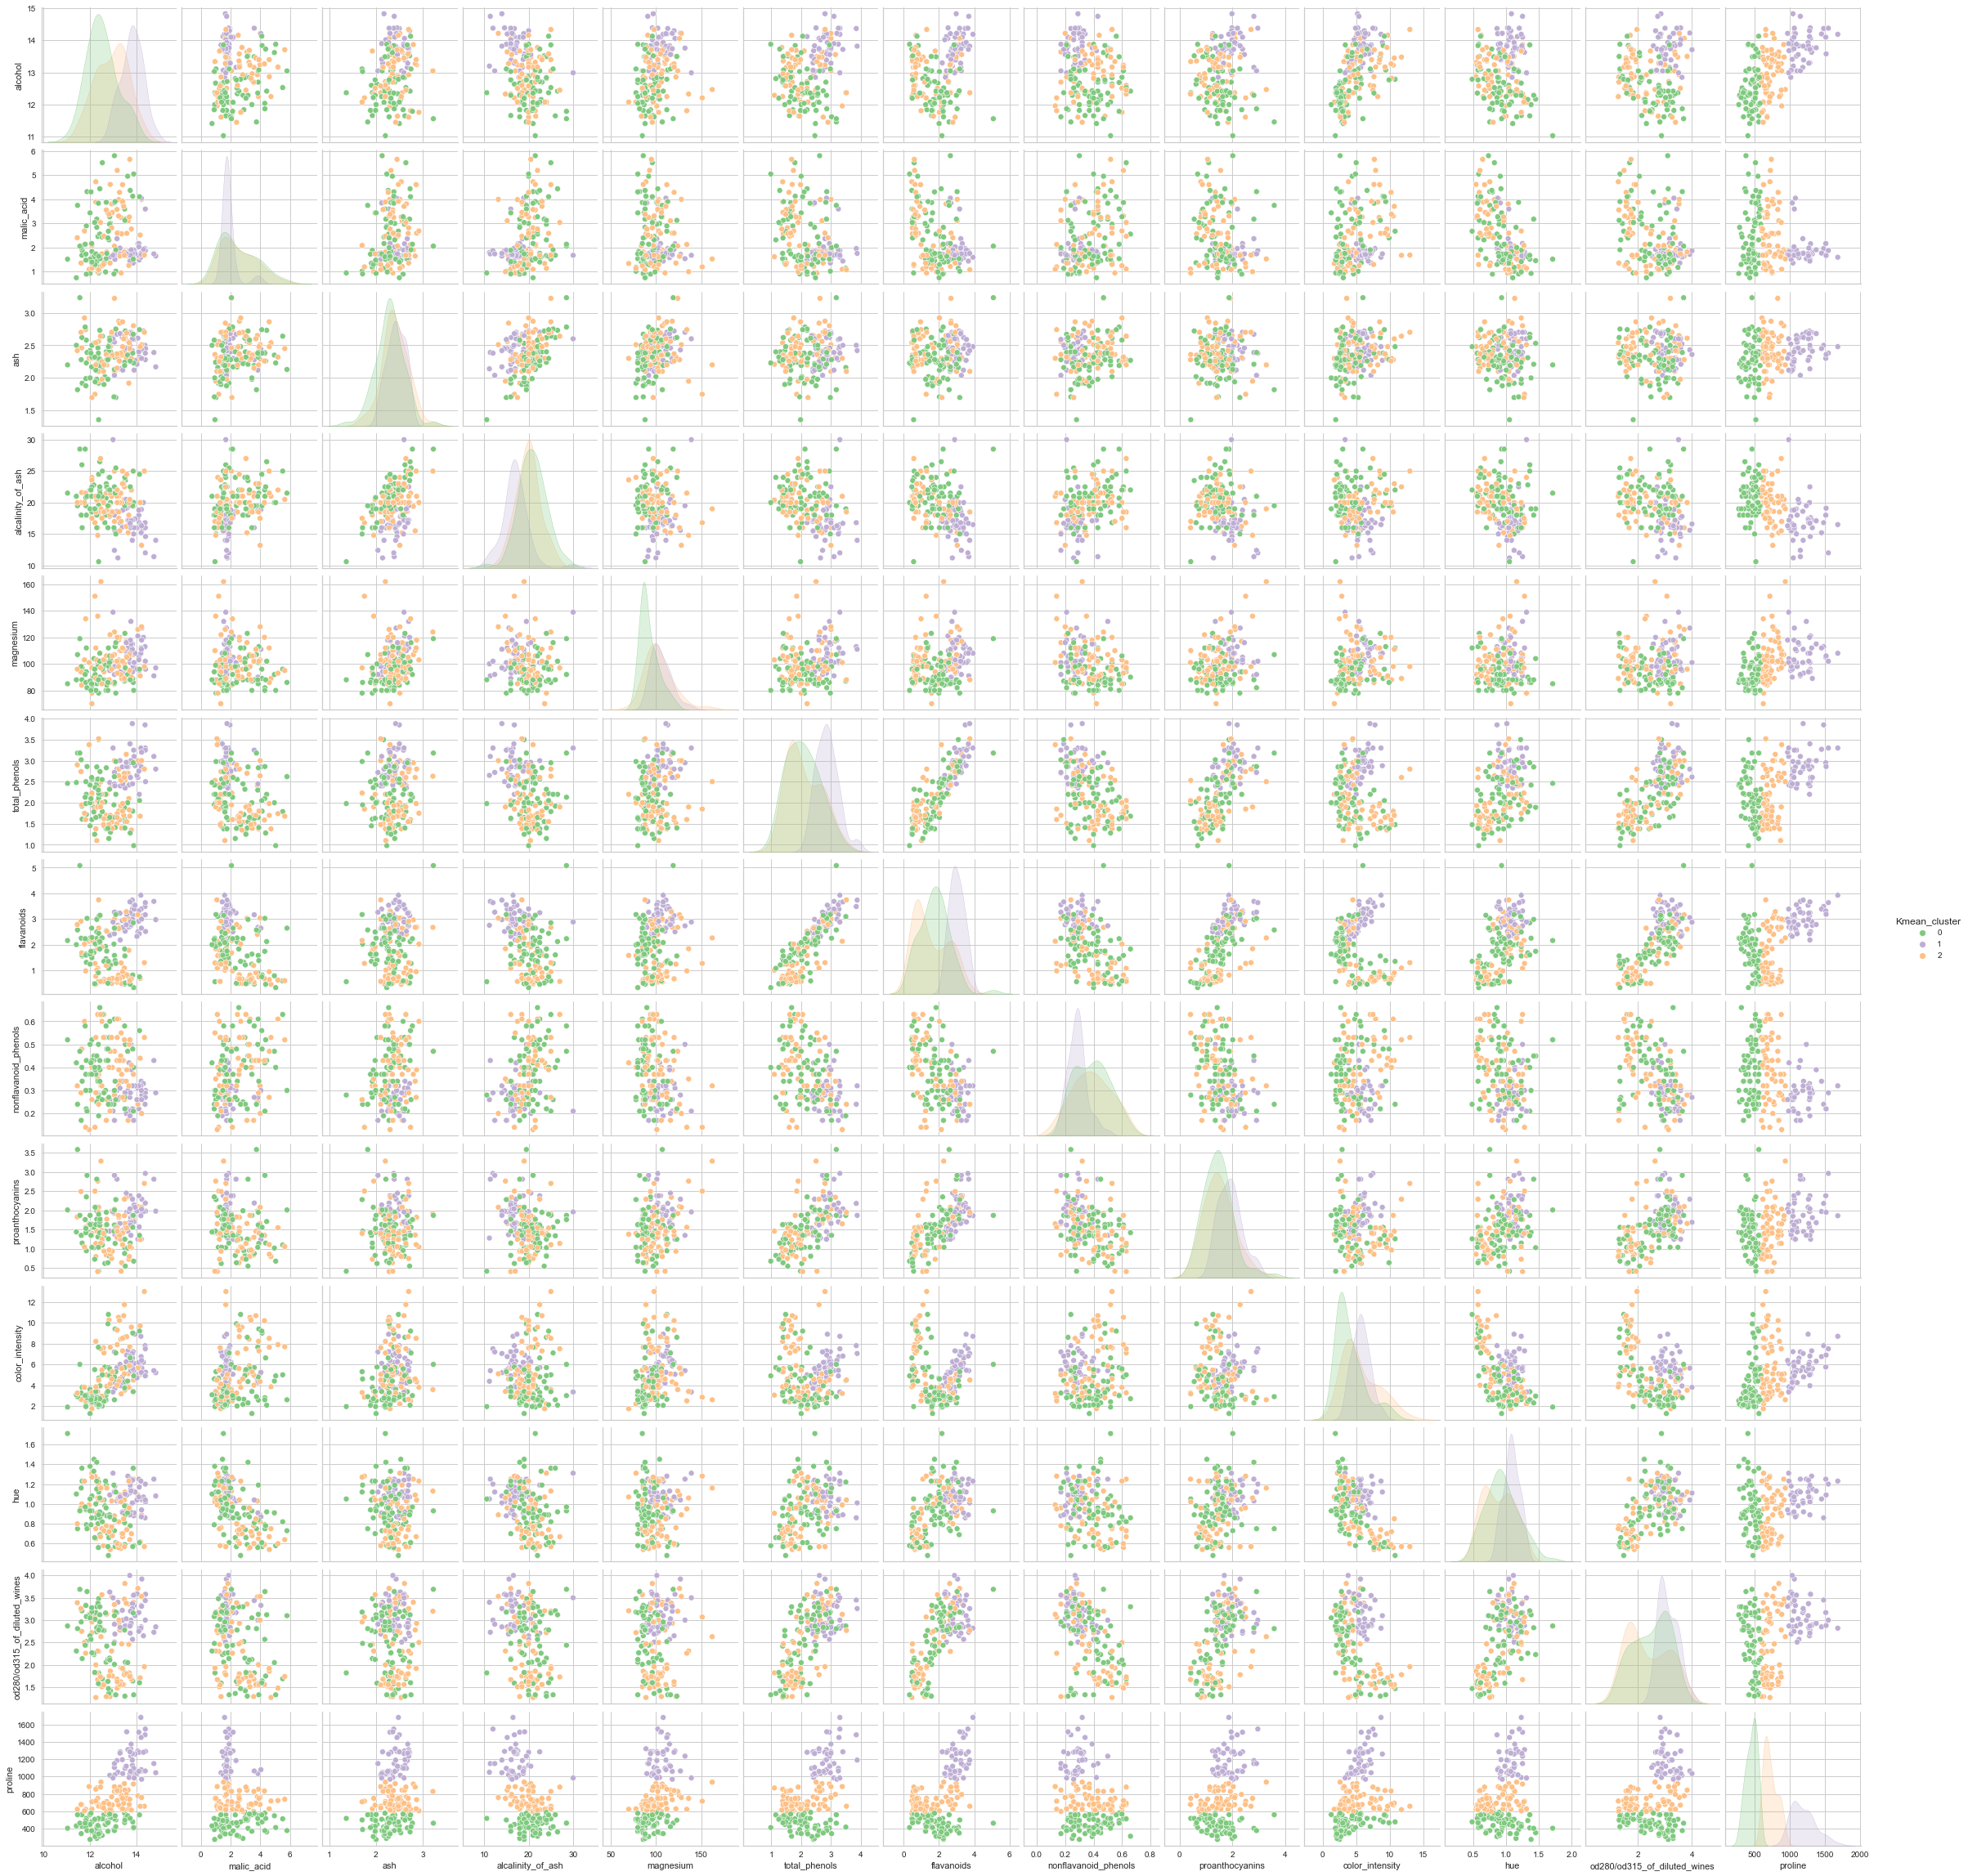

In [30]:
sns.pairplot(data = X, kind = 'scatter', hue = 'Kmean_cluster', palette = 'Accent');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [31]:
n_components = 5
pca = PCA(n_components = n_components)
pca.fit(X)
pca_model = pca.transform(X)
pca_data = pd.DataFrame(data = pca_model , columns = ['Componente_1', 'Componente_2', 'Componente_3', 'Componente_4', 'Componente_5'])
pca_data

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5
0,318.562840,21.485963,3.142487,-0.212098,0.791589
1,303.097288,-5.368185,6.824202,-0.867868,-0.454251
2,438.060924,-6.542579,-1.104603,0.939569,0.451671
3,733.239762,0.182551,-0.902268,-0.479593,1.015975
4,-11.570310,18.502579,-0.567974,1.303369,0.151432
...,...,...,...,...,...
173,-6.979096,-4.526310,-2.501807,-3.223691,-2.375539
174,3.132714,2.349216,-4.332062,-1.620878,-1.279118
175,88.459135,18.787590,-2.258302,-4.853372,-1.072923
176,93.457300,18.682029,-1.807592,-3.746722,-0.385208


In [32]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(pca_data)
cluster_pred = kmeans.predict(pca_data)
pca_data['Kmean_cluster'] = cluster_pred
pca_data

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Kmean_cluster
0,318.562840,21.485963,3.142487,-0.212098,0.791589,0
1,303.097288,-5.368185,6.824202,-0.867868,-0.454251,0
2,438.060924,-6.542579,-1.104603,0.939569,0.451671,0
3,733.239762,0.182551,-0.902268,-0.479593,1.015975,0
4,-11.570310,18.502579,-0.567974,1.303369,0.151432,1
...,...,...,...,...,...,...
173,-6.979096,-4.526310,-2.501807,-3.223691,-2.375539,1
174,3.132714,2.349216,-4.332062,-1.620878,-1.279118,1
175,88.459135,18.787590,-2.258302,-4.853372,-1.072923,1
176,93.457300,18.682029,-1.807592,-3.746722,-0.385208,1


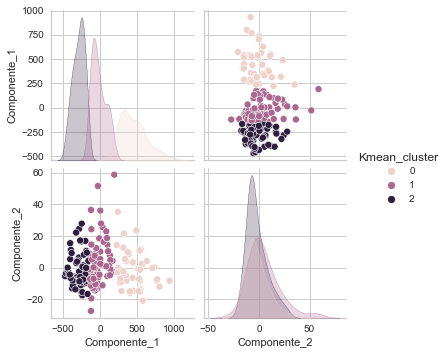

In [33]:
sns.pairplot(data = pca_data[['Componente_1', 'Componente_2', 'Kmean_cluster']], kind = 'scatter', hue = 'Kmean_cluster');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

C:\Users\angel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: Future

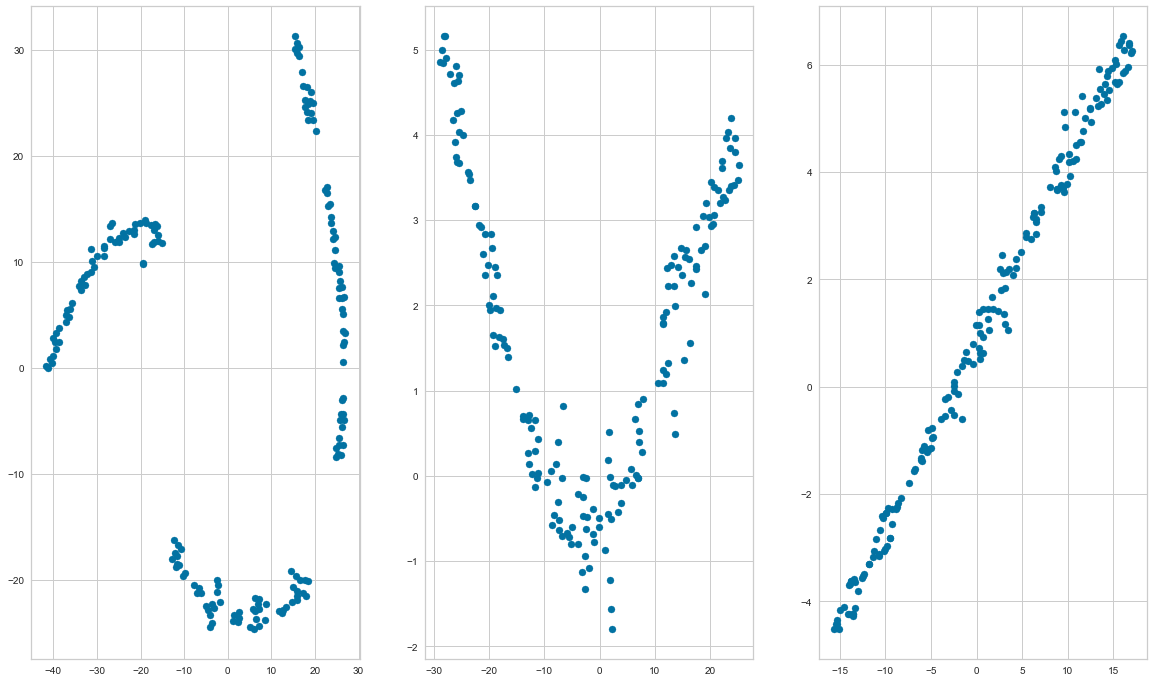

In [35]:
fig, ax = plt.subplots(1, 3, figsize = (20,12))

for i, perplejidad in enumerate([10, 20, 30]):
      tsne = TSNE(perplexity = perplejidad)
      x_incorporada = tsne.fit_transform(pca_data[['Componente_1', 'Componente_2']])
      ax[i].scatter(x_incorporada[:, 0], x_incorporada[:, 1])
plt.show();